In [33]:
import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

# Uppgift 1.
# A. Initial dataanalys

In [34]:
"""Här importerar vi filen och visar de första raderna i dataframen"""
covid19 = pd.read_excel("Data/Data-Covid19.xlsx", sheet_name="Veckodata Riket")
covid19.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [35]:
"""Här visar vi mer grundläggande information om "covid19" dataframen"""
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              90 non-null     int64  
 1   veckonummer                     90 non-null     int64  
 2   Antal_fall_vecka                90 non-null     int64  
 3   Antal_fall_100000inv_vecka      90 non-null     int64  
 4   Antal_fall_100000inv_14dagar    90 non-null     int64  
 5   Kum_antal_fall                  90 non-null     int64  
 6   Kum_fall_100000inv              90 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  90 non-null     int64  
 8   Kum_antal_intensivvårdade       90 non-null     int64  
 9   Antal_avlidna_vecka             90 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    90 non-null     float64
 11  Kum_antal_avlidna               90 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      90 non

# B. Slå ihop år + vecka

In [36]:
"""Här läser läser vi in filen igen för tydlighetens skull, gör en ny kolumn genom att kombinera året och veckan.
Vi tar också bort de två kolumnerna som användes till detta """
covid19 = pd.read_excel("Data/Data-Covid19.xlsx", sheet_name="Veckodata Riket")
covid19["Vecka"] = covid19["år"].astype(str) + "v" + covid19["veckonummer"].astype(str)
covid19 = covid19.drop(["veckonummer", "år"], axis=1)
covid19

,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,1,0,0,1,0,0,0,0,0.0,0,0.000000,2020v6
1,0,0,0,1,0,0,0,0,0.0,0,0.000000,2020v7
2,0,0,0,1,0,0,0,0,0.0,0,0.000000,2020v8
3,13,0,0,14,0,0,0,0,0.0,0,0.000000,2020v9
4,211,2,2,225,2,3,3,0,0.0,0,0.000000,2020v10
...,...,...,...,...,...,...,...,...,...,...,...,...
85,4307,41,101,1150068,11080,21,7844,40,3.9,14849,1430.599976,2021v38
86,4240,41,82,1154308,11121,17,7861,38,3.7,14887,1434.300049,2021v39
87,4140,40,81,1158448,11161,15,7876,49,4.7,14936,1439.000000,2021v40
88,4074,39,79,1162522,11200,13,7889,28,2.7,14964,1441.699951,2021v41


# 1. C, D, E och F med Seaborn grafer

In [37]:
"""Här importerar vi modulerna som kommer behövas för att plotta med seaborn"""
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

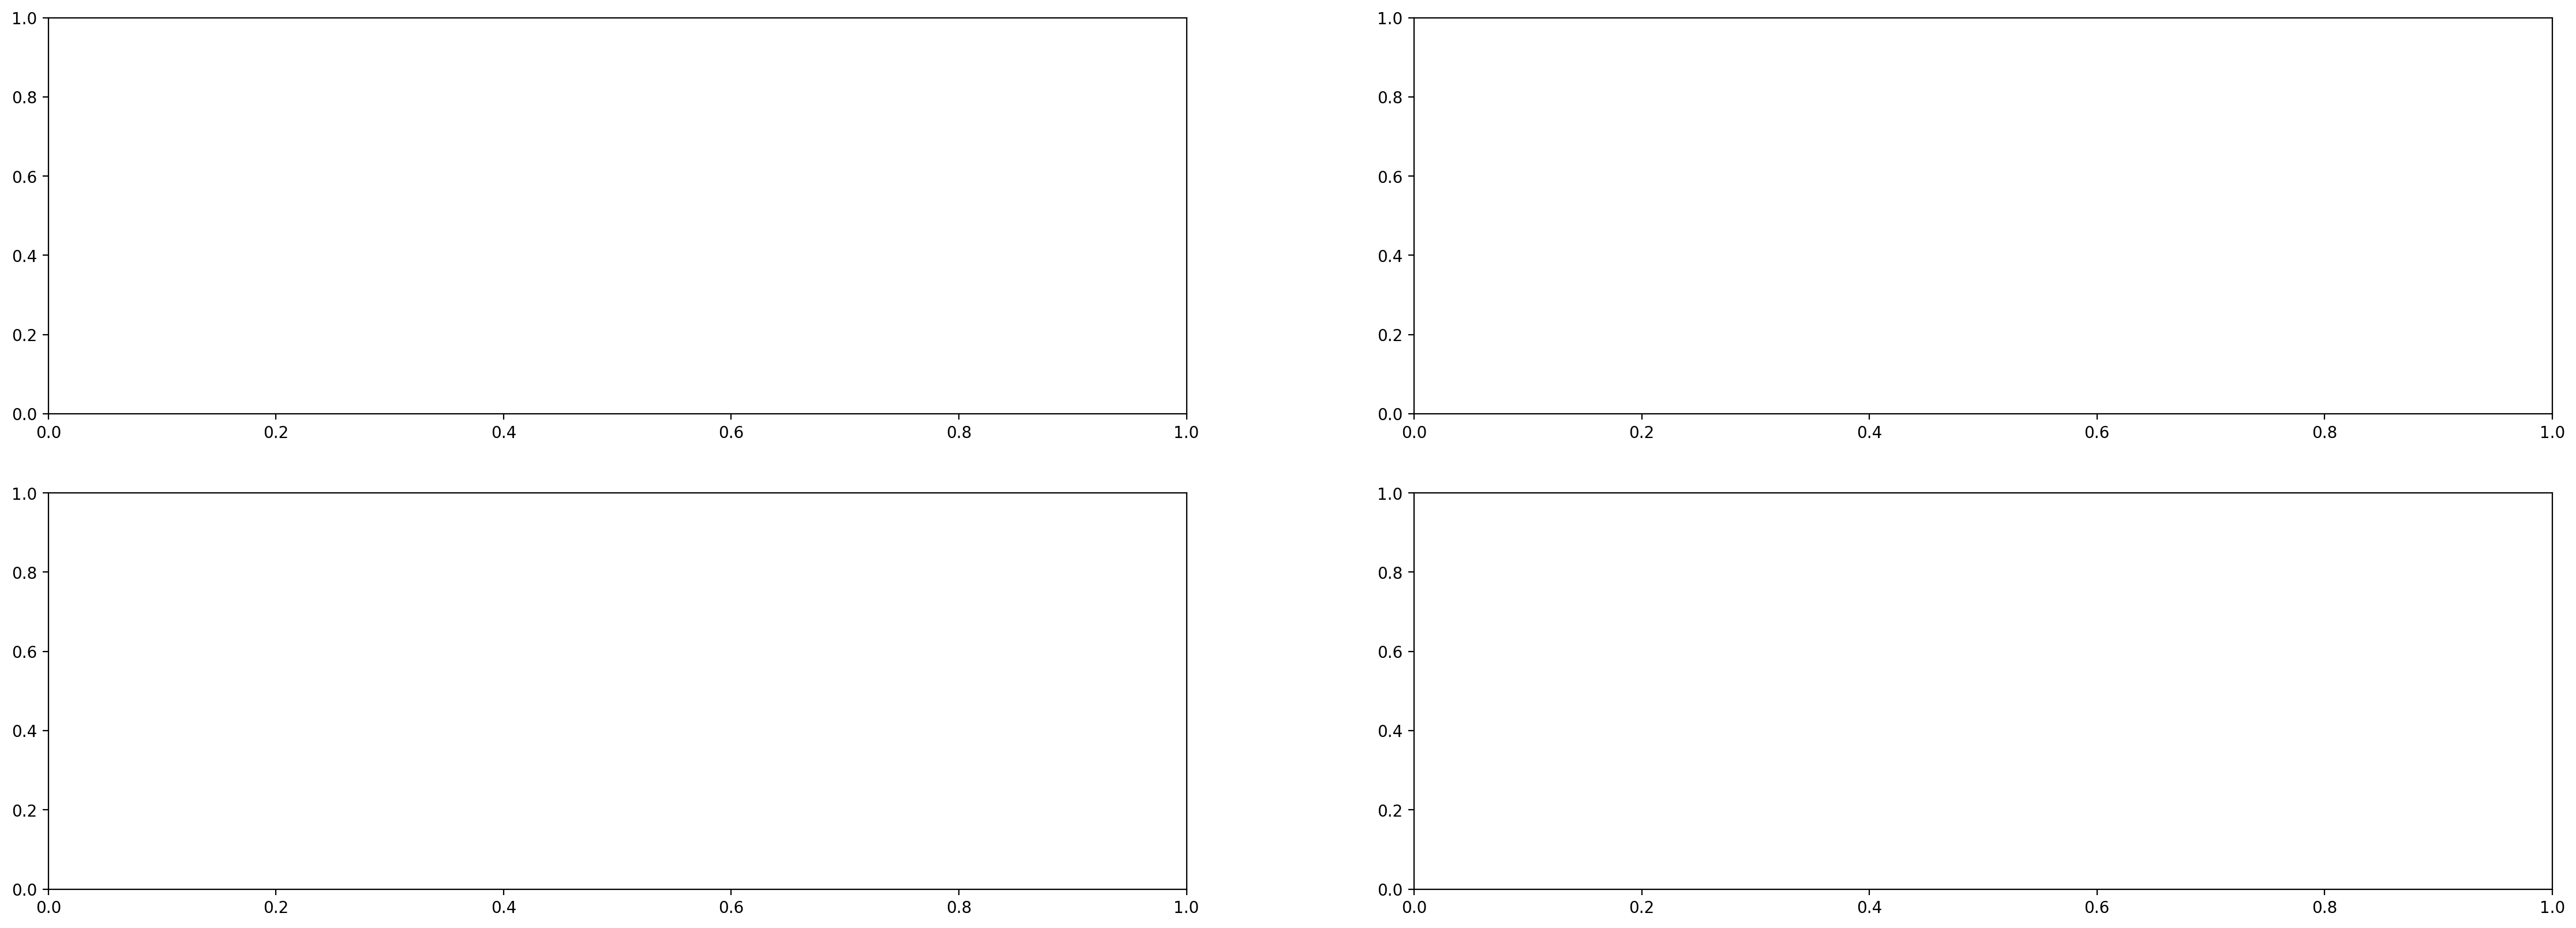

In [143]:
"""Här skapar vi en 2x2 subplot för att kunna plotta 4 grafer"""
fig, ax = plt.subplots(2, 2, figsize=(28,10))
fig.set_dpi(200)

In [144]:
"""Här skapar vi en funktion för att plotta varje axel i våra grafer
utan denna funktionen blir koden stökig väldigt snabbt"""

def draw_axes(axes, y_data, new_label, new_color):
    axes.plot(covid19["Vecka"], covid19[y_data], label=new_label, color=new_color)
    axes.legend()
    axes.tick_params(labelrotation=90)

In [146]:
"""Här kallar vi på funktionen med 3 av våra axlar"""

draw_axes(ax[0,0],"Antal_avlidna_vecka", "Antal avlidna/vecka 2020v6 - 2021v42", "red")
draw_axes(ax[0,1],"Antal_fall_vecka", "Antal nya fall/vecka 2020v6 - 2021v42", "blue")
draw_axes(ax[1,1],"Kum_antal_fall", "Antal avlidna/vecka 2020v6 - 2021v42", "orange")

In [145]:
"""Här gör vi en kopia på ax[1,0] och behåller x värdena men använder andra y-värden för att plotta
detta gör att vi i grafen kan se x-värdena(datumen) relativt till sina egna y-värden
samtidigt som vi får se det i samma graf.
Vi använder dessutom funktionen för att rita båda axlarna i samma ruta"""

draw_axes(ax[1,0],"Antal_avlidna_vecka", "Antal avlidna/vecka 2020v6 - 2021v42", "red")
ax2 = ax[1,0].twinx()
draw_axes(ax2,"Antal_fall_vecka", "Antal nya fall/vecka 2020v6 - 2021v42", "blue")

In [147]:
"""Tillsist sparar vi figuren  med alla 4 grafer som en png"""
fig.savefig("visualiseringar/1CDEF_seaborn.png", bbox_inches="tight")

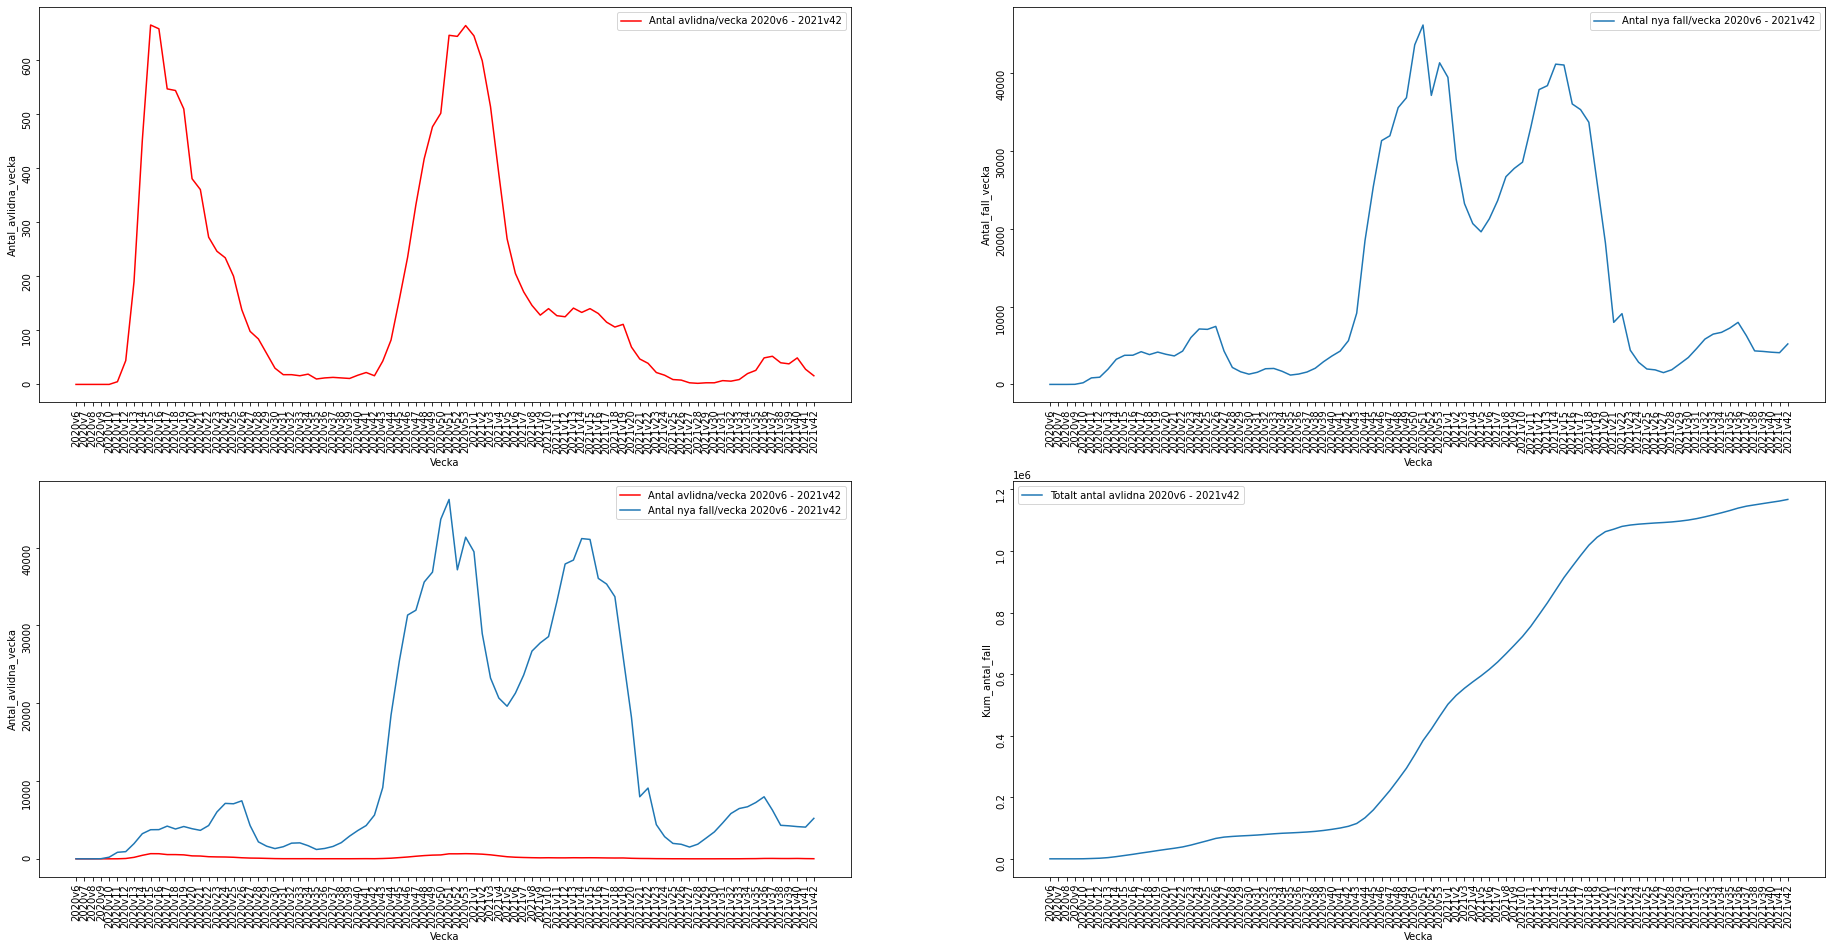

In [38]:
"""Här skapar vi en 2x2 subplot, och plottar den relevanta datan i varje plot
dessutom använder vi ax.tickparams för att rotera tickens på x-axeln för att få en något tydligare förståelse av datan"""
fig, ax = plt.subplots(2, 2, figsize=(32, 16))
sns.lineplot(data=covid19, x="Vecka", y="Antal_avlidna_vecka",label="Antal avlidna/vecka 2020v6 - 2021v42",color="red", ax=ax[0, 0])
sns.lineplot(data=covid19, x="Vecka", y="Antal_fall_vecka",label="Antal nya fall/vecka 2020v6 - 2021v42", ax=ax[0, 1])

sns.lineplot(data=covid19, x="Vecka", y="Antal_avlidna_vecka",label="Antal avlidna/vecka 2020v6 - 2021v42",color="red", ax=ax[1, 0])
sns.lineplot(data=covid19, x="Vecka", y="Antal_fall_vecka",label="Antal nya fall/vecka 2020v6 - 2021v42", ax=ax[1, 0])

sns.lineplot(data=covid19, x="Vecka", y="Kum_antal_fall",label="Totalt antal avlidna 2020v6 - 2021v42", ax=ax[1, 1])
ax[0,0].tick_params(labelrotation=90)
ax[0,1].tick_params(labelrotation=90)
ax[1,0].tick_params(labelrotation=90)
ax[1,1].tick_params(labelrotation=90)

In [39]:
"""Till sist sparar vi """
fig.savefig("visualiseringar/1CDEF_seaborn.png", bbox_inches="tight")

# C, D, F med plotly express

In [40]:
"""Här definierar vi en funktion för att plotta grafer med en axel med hjälp av plotly express"""

def draw_covid(y_data, new_graph_title, new_y_label, file_name):
    """Can draw first second and third graphs, cant draw graph with more than 1 y_data"""
    fig = px.line(covid19,
                x="Vecka",
                y=y_data,
                title=new_graph_title,
                labels={y_data:new_y_label},
                markers=True)

    fig.update_layout(hovermode="x")
    fig.update_xaxes(showspikes=True,
                    spikedash="solid",
                    spikemode="across",
                    spikecolor="blue",
                    spikesnap="cursor"
                    )

    fig.write_html(f"visualiseringar/{file_name}.html")

In [41]:
"""Här anroppar vi funktionen för uppgift C, D, och F"""
draw_covid(y_data="Antal_avlidna_vecka", new_graph_title="Antal avlidna/vecka 2020v6 - 2021v42", new_y_label="Antal avlidna", file_name="1C_antal_avlidna")
draw_covid(y_data="Antal_fall_vecka", new_graph_title="Antal nya fall/vecka 2020v6 - 2021v42", new_y_label="Antal nya fall", file_name="1d_antal_fall")
draw_covid(y_data="Kum_antal_fall", new_graph_title="Sammanlagda antal fall 2020v6 - 2021v42", new_y_label="Antal fall", file_name="1f_tot_antal_fall")

# E med plotly express

In [42]:
"""Här använder vi samma funktion som ovan fast vi har 2 y data"""
fig = px.line(covid19,
              x="Vecka",
              y=["Antal_avlidna_vecka", "Antal_fall_vecka"],
              title="Jämförelse avlidna och nya fall / vecka 2020v6 - 2021v42",
              labels={"Antal avlidna",
                      "Antal nya fall"})
fig.update_layout(hovermode="x")
fig.update_xaxes(showspikes=True,
                 spikedash="solid",
                 spikemode="across",
                 spikecolor="blue",
                 spikesnap="cursor"
                 )
fig.write_html(f"visualiseringar/1E_nya_fall+avlidna.html")

# Uppgift 2. Vaccin data

In [43]:
"""Läser in vaccin-datan"""
vaccine = pd.read_excel("Data/Data-Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")
vaccine

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal färdigvaccinerade,Andel minst 1 dos,Andel färdigvaccinerade
0,1,Stockholm,114,Upplands Väsby,16-17,1122,677,484,0.603387,0.431373
1,1,Stockholm,114,Upplands Väsby,18-29,6428,4195,3413,0.652614,0.530958
2,1,Stockholm,114,Upplands Väsby,30-39,7088,5004,4425,0.705982,0.624295
3,1,Stockholm,114,Upplands Väsby,40-49,6802,5329,5030,0.783446,0.739488
4,1,Stockholm,114,Upplands Väsby,50-59,6185,5363,5210,0.867098,0.842361
...,...,...,...,...,...,...,...,...,...,...
2605,25,Norrbotten,2584,Kiruna,50-59,3134,2916,2862,0.930440,0.913210
2606,25,Norrbotten,2584,Kiruna,60-69,2768,2596,2542,0.937861,0.918353
2607,25,Norrbotten,2584,Kiruna,70-79,2287,2159,2095,0.944031,0.916047
2608,25,Norrbotten,2584,Kiruna,80-89,1280,1233,1192,0.963281,0.931250


# A.

In [44]:
"""Beräkna antalet län i datasettet med hjälp av pd.unique()"""
antal_län = len(vaccine["Län_namn"].unique())
print(f"Antalet län i datasettet = {antal_län}")

Antalet län i datasettet = 21


# B.

In [45]:
"""Beräkna antalet kommuner i datasettet med hjälp av pd.unique()"""
antal_kommun = len(vaccine["Kommun_namn"].unique())
print(f"Antalet kommuner i datasettet: {antal_kommun}st")

Antalet kommuner i datasettet: 290st


# C.

In [46]:
"""Beräkna befolkningen i datasettet med hjälp av pd.sum()"""
dataset_befolkning  = vaccine["Befolkning"].sum()
print(f"Befolkningen i  vårat dataset: {dataset_befolkning}st")

Befolkningen i  vårat dataset: 8541497st


# D.

In [47]:
befolkning_2021 = 10427296
""" Enligt SCB, 2021 i augusti
https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/
Vårat dataset innehåller inga åldrar under 16 så uträkningen blir enkel
"""

antal_under_16 = befolkning_2021 - dataset_befolkning
print(f"Antalet barn under 16 år i Sverige är: {antal_under_16}st")


Antalet barn under 16 år i Sverige är: 1885799st


# E.

In [48]:
"""
https://stackoverflow.com/questions/56360610sum-column-based-on-another-column-in-pandas-dataframe 

Preparing dataframe for plotting by:
Summarizing the "Antal minst 1 dos", "Befolkning" and "Antal färdigvaccinerade column based on the "Län_namn"
to get the total of every column for every region in Sweden
"""
new_series=vaccine.groupby(by=["Län_namn"])["Antal minst 1 dos", "Befolkning", "Antal färdigvaccinerade"].sum()
new_df = pd.DataFrame(new_series)
new_df = new_df.reset_index()
new_df = new_df.sort_values(by="Antal minst 1 dos", ascending=False)
new_df["Andel färdigvaccinerade"] = new_df["Antal färdigvaccinerade"] / new_df["Befolkning"]
new_df["Andel 1 dos"] = new_df["Antal minst 1 dos"] / new_df["Befolkning"]

C:\Users\lukas\AppData\Local\Temp/ipykernel_15672/4034858182.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [49]:
"""Här plottar och sparar vi datan för andelen vaccinerade med minst 1 dos som vi förberedde i förra cellen"""
fig = px.bar(new_df, x="Län_namn", y="Andel 1 dos", color="Län_namn", title="Andel vaccinerade med minst 1 dos / län i Sverige")
fig.write_html(f"visualiseringar/2E_andel_minst_1_dos.html")
fig.show()

# E. Andel färdigvaccinerade per län

In [50]:
"""Här plottar och sparar vi datan för andelen färdigvaccinerade som vi förberedde i förra cellen"""
fig = px.bar(new_df, x="Län_namn", y="Andel färdigvaccinerade", color="Län_namn", title="Andelen vaccinerade / län i Sverige")
fig.write_html(f"visualiseringar/2E_andel_färdigvaccinerade.html")
fig.show()

In [51]:
fig = px.bar(new_df,
             x="Län_namn",
             y=["Andel färdigvaccinerade", "Andel 1 dos"],
             title="Andelen färdigvaccinerade + andelen vaccinerade med endast en dos",
             barmode="group",
             labels={"variable": "Typ av dosering",
                     "value": "Andel",
                     "Län_namn":"Län"})
fig.write_html(f"visualiseringar/2E_kombinerad_andel_färdigvaccinerade.html")
fig.show()


# F.

In [52]:
fig = px.bar(new_df,
       x="Län_namn",
       y=["Befolkning", "Antal färdigvaccinerade", "Antal minst 1 dos"],
       barmode="group",
       title="Jämförelse mellan befolkning, Antal färdigvaccinerade och Antalet vaccinerade med minst 1 dos",)
fig.update_layout(hovermode="x")
fig.write_html(f"visualiseringar/2F_befolkning_färdigvaccinerade_minst1dos.html")
fig.show()



# 3. KPI:er

### KPI:1
### Hur ser kopplingen ut mellan antalet intensivvårdade och antalet avlidna i Sverige?

In [53]:
"""Här importera vi pandas och läser in filerna"""
import pandas as pd
antal_avlidna_df = pd.read_excel("data/Data-Covid19.xlsx", sheet_name="Antal avlidna per dag")
antal_iv_vårdade_df = pd.read_excel("data/Data-Covid19.xlsx", sheet_name="Antal intensivvårdade per dag")

In [54]:
"""Här byter vi namn på columnerna för att få samma i båda dataframes"""
antal_avlidna_df = antal_avlidna_df.rename(columns={"Datum_avliden":"Datum"})
antal_avlidna_df = antal_avlidna_df[:-1] # Här saknas data så denna raden tas bort

antal_iv_vårdade_df = antal_iv_vårdade_df.rename(columns={"Datum_vårdstart":"Datum"})

In [55]:
"""Eftersom datumen är i två olika format gör vi om dem till samma format med hjälp av pd.to_datetime"""
antal_avlidna_df["Datum"] = pd.to_datetime(antal_avlidna_df["Datum"], format="%Y/%m/%d")
antal_iv_vårdade_df["Datum"] = pd.to_datetime(antal_iv_vårdade_df["Datum"], format="%d/%m/%Y")


In [56]:
"""Här mergar vi båda dataframes för att koppla datumen till varandra
vi joiner med (inner) för att bara få ta bort datapunkter där vi inte har data för både avlidna och iv-vårdade
detta gör visualiseringen tydligare"""
avlidna_och_vårdade = pd.merge(antal_avlidna_df, antal_iv_vårdade_df, how="inner")

In [57]:
"""Här plottar och sparar vi datan"""
fig = px.line(data_frame=avlidna_och_vårdade, x="Datum", y= ["Antal_avlidna", "Antal_intensivvårdade"], title="Jämförelse mellan antalet avlidna och antalet intensivvårdade i Sverige")
fig.update_layout(hovermode="x")
fig.update_xaxes(showspikes=True,
                 spikedash="solid",
                 spikemode="across",
                 spikecolor="blue",
                 spikesnap="cursor"
                 )
fig.write_html("visualiseringar/3kpi_avlidna_och_ivvårdade.html")
fig.show()


In [58]:
"""
Det man kan se är att även om dödsfallen vid vissa datum stiger till mer än 100/dag så stiger aldrig antalet iv-vårdade till mer än cirka 45-50st
Finns det inte kapacitet för mer? Och om det är fallet, är det en anledning att så många dör? Hade fler iv-platser minskat antalet dödsfall i en framtida pandemi?
"""

'\nDet man kan se är att även om dödsfallen vid vissa datum stiger till mer än 100/dag så stiger aldrig antalet iv-vårdade till mer än cirka 45-50st\nFinns det inte kapacitet för mer? Och om det är fallet, är det en anledning att så många dör? Hade fler iv-platser minskat antalet dödsfall i en framtida pandemi?\n'

# KPI:2
## Hur ser kopplingen mellan antalet färdigvaccinerade och antalet avlidna i Sverige?

In [59]:
"""
Här använder jag plotly.graph_object för att jag vill plotta 2 axlar med gemensamt x, men jag vill ha separata y värden
då det första y värdet kommer vara antalet avlidna den veckan, medans den andra plotten kommer vara ett procent-tal
"""
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [60]:
"""Läser in filerna"""

antalet_färdigvacc_df = pd.read_excel("data/Data-Vaccine.xlsx", sheet_name="Vaccinerade tidsserie")
antal_avlidna_df = pd.read_excel("data/Data-Covid19.xlsx", sheet_name="Veckodata Riket")

In [61]:
"""Städar datan, tar bort data som stör visualiseringen och väljer ett nytt gemensamt namn för datum columnen"""

antalet_färdigvacc_df = antalet_färdigvacc_df[antalet_färdigvacc_df["Region"] == "| Sverige |"]
antalet_färdigvacc_df = antalet_färdigvacc_df[antalet_färdigvacc_df["Vaccinationsstatus"]=="Färdigvaccinerade"]
antalet_färdigvacc_df["Vecka+År"] = antalet_färdigvacc_df["År"].astype("str") +"v"+ antalet_färdigvacc_df["Vecka"].astype("str")

antal_avlidna_df["Vecka+År"] = antal_avlidna_df["år"].astype("str") +"v"+ antal_avlidna_df["veckonummer"].astype("str")

In [62]:
"""Mergar datan till 1 frame för att få datumen kopplade till varandra
och tar bort all irrelevant data för enkelhetens skull"""

new_df = antal_avlidna_df.merge(antalet_färdigvacc_df)
new_df = new_df.filter(["Vecka+År", "Antal_avlidna_vecka", "Andel vaccinerade"])
new_df.head()

,Vecka+År,Antal_avlidna_vecka,Andel vaccinerade
0,2020v52,643,0.000000
1,2020v53,663,0.000000
2,2021v1,644,0.000000
3,2021v2,598,0.000066
4,2021v3,513,0.001394


In [63]:
"""Plottar och sparar datan"""
"""https://plotly.com/python/multiple-axes/"""

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Line(x=new_df["Vecka+År"], y=new_df["Antal_avlidna_vecka"]),
    secondary_y=False
)
fig.add_trace(
    go.Line(x=new_df["Vecka+År"], y=new_df['Andel vaccinerade']),
    secondary_y=True
)
fig.update_layout(title_text="Kopplingen mellan det totala antalet vaccinerade personer och antalet avlidna/vecka 2020v52 - 2021v42")
fig.update_layout(hovermode="x")
fig.update_xaxes(title_text="Datum")
fig.update_yaxes(title_text="Antalet avlidna/dag", secondary_y=False)
fig.update_yaxes(title_text="Procentuelt antal vaccinerade", secondary_y=True)

fig.write_html("visualiseringar/3kpi_avlidna_och_vaccinerade.html")
fig.show()

C:\Users\lukas\.virtualenvs\databehandling_Lukas_Kallstrom-CpW1M07S\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [30]:
"""
Man kan se att antalet avlidna börjar sjunka redan tidigt 2021, samtidigt som vaccinationerna börjar dra igång ordentligt, vilket tydligt visar på att vaccinationerna
har en effekt på befolkningen. Däremot håller sig antalet avlidna/dag på strax under 200 även om vaccinationerna fortsätter, ända tills vaccinationerna drar igång ordentligt.
Vad är det som händer här? Är det att vi börjar lätta på restriktioner innan vi faktiskt hunnit bli riktigt "immuna"? Eller handlar det om att man som befolkning inte orkar
hålla sig ensam hemma längre? Eller möjligtvis en kombination?
"""

'\nMan kan se att antalet avlidna börjar sjunka redan tidigt 2021, samtidigt som vaccinationerna börjar dra igång ordentligt, vilket tydligt visar på att vaccinationerna\nhar en effekt på befolkningen. Däremot håller sig antalet avlidna/dag på strax under 200 även om vaccinationerna fortsätter, ända tills vaccinationerna drar igång ordentligt.\nVad är det som händer här? Är det att vi börjar lätta på restriktioner innan vi faktiskt hunnit bli riktigt "immuna"? Eller handlar det om att man som befolkning inte orkar\nhålla sig ensam hemma längre? Eller möjligtvis en kombination?\n'

# KPI:3

## Hur jämför sig åldrarna när det kommer till antalet intensivvårdade och antalet avlidna?

In [31]:
"Totalt antal per åldersgrupp"
åldergrupper = pd.read_excel(
    "data/Data-Covid19.xlsx",
    sheet_name="Totalt antal per åldersgrupp")[:-1]

fig = px.bar(åldergrupper,
       "Åldersgrupp",
       ["Totalt_antal_avlidna", "Totalt_antal_intensivvårdade"],
       barmode="group",
       labels={"value":"Antal",
       "Totalt_antal_avlidna":"Totalt antal avlidna"},
       title="Jämförelse mellan Totalt antalt avlidna och totalt antal intensivvårdade per åldersgrupp")
fig.update_layout(hovermode="x")
fig.write_html("visualiseringar/3kpi_avlidna_ivvårdade_åldersgrupper.html")
fig.show()


In [32]:
"""
Vi ser väldigt tydligt att gruppen med flest avlidna är åldersgruppen 80-89 som nästan har mer än 70-79 och 90+ tillsammans. 
Däremot har samma åldersgrupp mindre än 500 intensivvårdade totalt. Varför är det så? Hade fler iv-platser underlättat?
eller handlar det om att man inte vill "slösa" resurser på såpass gamla människor, 90+ har totalt endast 10 personer som blivit inlagda på iv-vård.
Det är också möjligt att 80 och är såpass utsatta att en intensivvård inte hjälper någonting.
"""

'\nVi ser väldigt tydligt att gruppen med flest avlidna är åldersgruppen 80-89 som nästan har mer än 70-79 och 90+ tillsammans. \nDäremot har samma åldersgrupp mindre än 500 intensivvårdade totalt. Varför är det så? Hade fler iv-platser underlättat?\neller handlar det om att man inte vill "slösa" resurser på såpass gamla människor, 90+ har totalt endast 10 personer som blivit inlagda på iv-vård.\nDet är också möjligt att 80 och är såpass utsatta att en intensivvård inte hjälper någonting.\n'